In [1]:
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt
import PV_ICE
cwd = os.getcwd() #grabs current working directory


In [2]:
#print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("pyplot ", plt.matplotlib.__version__)
print("PV_ICE version ", PV_ICE.__version__)

Python version  3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
Pandas version  2.0.3
pyplot  3.7.2
PV_ICE version  


In [2]:
#Lifetime and Degradation
#median annual power degradation Jordan et al 2022, Table 6
idx_temp = pd.RangeIndex(start=2022,stop=2051,step=1) #create the index

df_shj_eff = pd.DataFrame(index=idx_temp, columns=['mod_eff'], dtype=float)
df_shj_eff.loc[2022] = 17.9
#df_shj_eff.loc[2040] = 22
df_shj_eff.loc[2050] = 27.3
df_shj_eff.interpolate(inplace=True)

df_shj_deg = pd.DataFrame(index=idx_temp, columns=['mod_deg'], dtype=float)
df_shj_deg.loc[2022] = 1.1
#df_shj_deg.loc[2030] = 0.7
df_shj_deg.loc[2050] = 0.73
df_shj_deg.interpolate(inplace=True)

#degradation rate:
#sim1.modifyScenario('SHJ', 'mod_degradation', df_shj_deg.loc[2022:,'mod_deg'], start_year=2022) 

#Mod Project Lifetime
df_shj_life = pd.DataFrame(index=idx_temp, columns=['mod_lifetime'], dtype=float)
df_shj_life.loc[2022] = 25
#df_shj_life.loc[2030] = 19
df_shj_life.loc[2050] = 40
df_shj_life.interpolate(inplace=True)
#sim1.modifyScenario('SHJ', 'mod_lifetime', df_shj_life.loc[2022:,'mod_lifetime'], start_year=2022) #

#T50
df_shj_t50 = pd.DataFrame(index=idx_temp, columns=['mod_t50'], dtype=float)
df_shj_t50.loc[2022] = 39
df_shj_t50.loc[2030] = 46
df_shj_t50.loc[2050] = 54.5
df_shj_t50.interpolate(inplace=True)
#sim1.modifyScenario('SHJ', 'mod_reliability_t50', df_shj_t50.loc[2022:,'mod_t50'], start_year=2022)
#t90
df_shj_t90 = pd.DataFrame(index=idx_temp, columns=['mod_t90'], dtype=float)
df_shj_t90.loc[2022] = 42
df_shj_t90.loc[2030] = 49
df_shj_t90.loc[2050] = 57.5
df_shj_t90.interpolate(inplace=True)
#sim1.modifyScenario('SHJ', 'mod_reliability_t90', df_shj_t90.loc[2022:,'mod_t90'], start_year=2022) 

pd.concat([df_shj_eff,df_shj_t50,df_shj_t90,df_shj_deg,df_shj_life], axis=1)

,mod_eff,mod_t50,mod_t90,mod_deg,mod_lifetime
2022,17.900000,39.000,42.000,1.100000,25.000000
2023,18.235714,39.875,42.875,1.086786,25.535714
2024,18.571429,40.750,43.750,1.073571,26.071429
2025,18.907143,41.625,44.625,1.060357,26.607143
2026,19.242857,42.500,45.500,1.047143,27.142857
2027,19.578571,43.375,46.375,1.033929,27.678571
2028,19.914286,44.250,47.250,1.020714,28.214286
2029,20.250000,45.125,48.125,1.007500,28.750000
2030,20.585714,46.000,49.000,0.994286,29.285714
2031,20.921429,46.425,49.425,0.981071,29.821429


In [3]:
idx_temp = pd.RangeIndex(start=2022,stop=2051,step=1) #create the index
df_shj_merchanttail = pd.DataFrame(index=idx_temp, columns=['mod_merchanttail'], dtype=float)
df_shj_merchanttail.loc[2022] = 0
df_shj_merchanttail.loc[2030] = 0
df_shj_merchanttail.loc[2050] = 0
df_shj_merchanttail.interpolate(inplace=True)
#module collection
df_shj_modcollect = pd.DataFrame(index=idx_temp, columns=['mod_collect'], dtype=float)
df_shj_modcollect.loc[2022] = 15
df_shj_modcollect.loc[2030] = 30
df_shj_modcollect.loc[2050] = 75
df_shj_modcollect.interpolate(inplace=True)
#collection
#sim1.modifyScenario('SHJ', 'mod_EOL_collection_eff', df_shj_modcollect.loc[2022:,'mod_collect'], start_year=2022) #
df_shj_modremfg = pd.DataFrame(index=idx_temp, columns=['mod_remfg'], dtype=float)
df_shj_modremfg.loc[2022] = 0
df_shj_modremfg.loc[2030] = 0
df_shj_modremfg.loc[2050] = 0
df_shj_modremfg.interpolate(inplace=True)

#module recycling target
df_shj_modrecycle = pd.DataFrame(index=idx_temp, columns=['mod_recycle'], dtype=float)
df_shj_modrecycle.loc[2022] = 75
df_shj_modrecycle.loc[2030] = 80
df_shj_modrecycle.loc[2050] = 95
df_shj_modrecycle.interpolate(inplace=True)

df_modrecycle_alt = 100-df_shj_modrecycle

pd.concat([df_shj_merchanttail,df_shj_modcollect,df_shj_modremfg,df_shj_modrecycle, df_modrecycle_alt], axis=1)

,mod_merchanttail,mod_collect,mod_remfg,mod_recycle,mod_recycle
2022,0.0,15.000,0.0,75.000,25.000
2023,0.0,16.875,0.0,75.625,24.375
2024,0.0,18.750,0.0,76.250,23.750
2025,0.0,20.625,0.0,76.875,23.125
2026,0.0,22.500,0.0,77.500,22.500
2027,0.0,24.375,0.0,78.125,21.875
2028,0.0,26.250,0.0,78.750,21.250
2029,0.0,28.125,0.0,79.375,20.625
2030,0.0,30.000,0.0,80.000,20.000
2031,0.0,32.250,0.0,80.750,19.250


In [4]:
idx_temp = pd.RangeIndex(start=2022,stop=2051,step=1) #create the index
columns = ['mat_MFG_scrap_Recycled','mat_MFG_scrap_Recycling_eff','mat_MFG_scrap_Recycled_into_HQ',
           'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG','mat_PG3_ReMFG_target','mat_ReMFG_yield',
           'mat_PG4_Recycling_target','mat_Recycling_yield','mat_EOL_Recycled_into_HQ','mat_EOL_RecycledHQ_Reused4MFG']
glassimprovedrecycle = pd.DataFrame(index=idx_temp, columns=columns, dtype=float)

#MFGing Scrap
glassimprovedrecycle['mat_MFG_scrap_Recycled'].loc[2022] = 80
glassimprovedrecycle['mat_MFG_scrap_Recycled'].loc[2030] = 100
glassimprovedrecycle['mat_MFG_scrap_Recycled'].loc[2050] = 100

glassimprovedrecycle['mat_MFG_scrap_Recycling_eff'].loc[2022] = 50
glassimprovedrecycle['mat_MFG_scrap_Recycling_eff'].loc[2030] = 80
glassimprovedrecycle['mat_MFG_scrap_Recycling_eff'].loc[2050] = 90

glassimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ'].loc[2022] = 0
glassimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ'].loc[2030] = 30
glassimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ'].loc[2050] = 75

glassimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'].loc[2022] = 0
glassimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'].loc[2030] = 100
glassimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'].loc[2050] = 100

#REMFG

glassimprovedrecycle['mat_PG3_ReMFG_target'].loc[2022] = 0
glassimprovedrecycle['mat_PG3_ReMFG_target'].loc[2030] = 50
glassimprovedrecycle['mat_PG3_ReMFG_target'].loc[2050] = 100


glassimprovedrecycle['mat_ReMFG_yield'].loc[2022] = 60
glassimprovedrecycle['mat_ReMFG_yield'].loc[2030] = 80
glassimprovedrecycle['mat_ReMFG_yield'].loc[2050] = 98

#EoL Recycling
#glassimprovedrecycle['mat_PG4_Recycling_target'].loc[2022] = 90
#glassimprovedrecycle['mat_PG4_Recycling_target'].loc[2030] = 100
#glassimprovedrecycle['mat_PG4_Recycling_target'].loc[2050] = 100
glassimprovedrecycle['mat_PG4_Recycling_target'] = 100-glassimprovedrecycle['mat_PG3_ReMFG_target']

glassimprovedrecycle['mat_Recycling_yield'].loc[2022] = 40
glassimprovedrecycle['mat_Recycling_yield'].loc[2030] = 60
glassimprovedrecycle['mat_Recycling_yield'].loc[2050] = 90

glassimprovedrecycle['mat_EOL_Recycled_into_HQ'].loc[2022] = 0
glassimprovedrecycle['mat_EOL_Recycled_into_HQ'].loc[2030] = 30
glassimprovedrecycle['mat_EOL_Recycled_into_HQ'].loc[2050] = 75

glassimprovedrecycle['mat_EOL_RecycledHQ_Reused4MFG'].loc[2022] = 100
glassimprovedrecycle['mat_EOL_RecycledHQ_Reused4MFG'].loc[2030] = 100
glassimprovedrecycle['mat_EOL_RecycledHQ_Reused4MFG'].loc[2050] = 100


glassimprovedrecycle.interpolate()

,mat_MFG_scrap_Recycled,mat_MFG_scrap_Recycling_eff,mat_MFG_scrap_Recycled_into_HQ,mat_MFG_scrap_Recycled_into_HQ_Reused4MFG,mat_PG3_ReMFG_target,mat_ReMFG_yield,mat_PG4_Recycling_target,mat_Recycling_yield,mat_EOL_Recycled_into_HQ,mat_EOL_RecycledHQ_Reused4MFG
2022,80.0,50.00,0.00,0.0,0.00,60.0,100.00,40.0,0.00,100.0
2023,82.5,53.75,3.75,12.5,6.25,62.5,93.75,42.5,3.75,100.0
2024,85.0,57.50,7.50,25.0,12.50,65.0,87.50,45.0,7.50,100.0
2025,87.5,61.25,11.25,37.5,18.75,67.5,81.25,47.5,11.25,100.0
2026,90.0,65.00,15.00,50.0,25.00,70.0,75.00,50.0,15.00,100.0
2027,92.5,68.75,18.75,62.5,31.25,72.5,68.75,52.5,18.75,100.0
2028,95.0,72.50,22.50,75.0,37.50,75.0,62.50,55.0,22.50,100.0
2029,97.5,76.25,26.25,87.5,43.75,77.5,56.25,57.5,26.25,100.0
2030,100.0,80.00,30.00,100.0,50.00,80.0,50.00,60.0,30.00,100.0
2031,100.0,80.50,32.25,100.0,52.50,80.9,47.50,61.5,32.25,100.0


In [5]:
idx_temp = pd.RangeIndex(start=2022,stop=2051,step=1) #create the index
columns = ['mat_MFG_scrap_Recycled','mat_MFG_scrap_Recycling_eff','mat_MFG_scrap_Recycled_into_HQ',
           'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG','mat_PG3_ReMFG_target','mat_ReMFG_yield',
           'mat_PG4_Recycling_target','mat_Recycling_yield','mat_EOL_Recycled_into_HQ','mat_EOL_RecycledHQ_Reused4MFG']
Siimprovedrecycle = pd.DataFrame(index=idx_temp, columns=columns, dtype=float)

#MFGing Scrap
Siimprovedrecycle['mat_MFG_scrap_Recycled'].loc[2022] = 100
Siimprovedrecycle['mat_MFG_scrap_Recycled'].loc[2030] = 100
Siimprovedrecycle['mat_MFG_scrap_Recycled'].loc[2050] = 100

Siimprovedrecycle['mat_MFG_scrap_Recycling_eff'].loc[2022] = 20
Siimprovedrecycle['mat_MFG_scrap_Recycling_eff'].loc[2030] = 30
Siimprovedrecycle['mat_MFG_scrap_Recycling_eff'].loc[2050] = 60

Siimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ'].loc[2022] = 0
Siimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ'].loc[2030] = 50
Siimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ'].loc[2050] = 100

Siimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'].loc[2022] = 100
Siimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'].loc[2030] = 100
Siimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'].loc[2050] = 100

#REMFG

Siimprovedrecycle['mat_PG3_ReMFG_target'].loc[2022] = 0
Siimprovedrecycle['mat_PG3_ReMFG_target'].loc[2030] = 30
Siimprovedrecycle['mat_PG3_ReMFG_target'].loc[2050] = 80

Siimprovedrecycle['mat_ReMFG_yield'].loc[2022] = 0
Siimprovedrecycle['mat_ReMFG_yield'].loc[2030] = 50
Siimprovedrecycle['mat_ReMFG_yield'].loc[2050] = 90

#EoL Recycling
Siimprovedrecycle['mat_PG4_Recycling_target'].loc[2022] = 100
Siimprovedrecycle['mat_PG4_Recycling_target'].loc[2030] = 50
Siimprovedrecycle['mat_PG4_Recycling_target'].loc[2050] = 10

Siimprovedrecycle['mat_Recycling_yield'].loc[2022] = 20
Siimprovedrecycle['mat_Recycling_yield'].loc[2030] = 30
Siimprovedrecycle['mat_Recycling_yield'].loc[2050] = 75

Siimprovedrecycle['mat_EOL_Recycled_into_HQ'].loc[2022] = 0
Siimprovedrecycle['mat_EOL_Recycled_into_HQ'].loc[2030] = 50
Siimprovedrecycle['mat_EOL_Recycled_into_HQ'].loc[2050] = 90

Siimprovedrecycle['mat_EOL_RecycledHQ_Reused4MFG'].loc[2022] = 0
Siimprovedrecycle['mat_EOL_RecycledHQ_Reused4MFG'].loc[2030] = 100
Siimprovedrecycle['mat_EOL_RecycledHQ_Reused4MFG'].loc[2050] = 100


Siimprovedrecycle.interpolate()

,mat_MFG_scrap_Recycled,mat_MFG_scrap_Recycling_eff,mat_MFG_scrap_Recycled_into_HQ,mat_MFG_scrap_Recycled_into_HQ_Reused4MFG,mat_PG3_ReMFG_target,mat_ReMFG_yield,mat_PG4_Recycling_target,mat_Recycling_yield,mat_EOL_Recycled_into_HQ,mat_EOL_RecycledHQ_Reused4MFG
2022,100.0,20.00,0.00,100.0,0.00,0.00,100.00,20.00,0.00,0.0
2023,100.0,21.25,6.25,100.0,3.75,6.25,93.75,21.25,6.25,12.5
2024,100.0,22.50,12.50,100.0,7.50,12.50,87.50,22.50,12.50,25.0
2025,100.0,23.75,18.75,100.0,11.25,18.75,81.25,23.75,18.75,37.5
2026,100.0,25.00,25.00,100.0,15.00,25.00,75.00,25.00,25.00,50.0
2027,100.0,26.25,31.25,100.0,18.75,31.25,68.75,26.25,31.25,62.5
2028,100.0,27.50,37.50,100.0,22.50,37.50,62.50,27.50,37.50,75.0
2029,100.0,28.75,43.75,100.0,26.25,43.75,56.25,28.75,43.75,87.5
2030,100.0,30.00,50.00,100.0,30.00,50.00,50.00,30.00,50.00,100.0
2031,100.0,31.50,52.50,100.0,32.50,52.00,48.00,32.25,52.00,100.0


In [6]:
idx_temp = pd.RangeIndex(start=2022,stop=2051,step=1) #create the index
columns = ['mat_MFG_scrap_Recycled','mat_MFG_scrap_Recycling_eff','mat_MFG_scrap_Recycled_into_HQ',
           'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG','mat_PG3_ReMFG_target','mat_ReMFG_yield',
           'mat_PG4_Recycling_target','mat_Recycling_yield','mat_EOL_Recycled_into_HQ','mat_EOL_RecycledHQ_Reused4MFG']
Alimprovedrecycle = pd.DataFrame(index=idx_temp, columns=columns, dtype=float)

#MFGing Scrap
Alimprovedrecycle['mat_MFG_scrap_Recycled'].loc[2022] = 100
Alimprovedrecycle['mat_MFG_scrap_Recycled'].loc[2030] = 100
Alimprovedrecycle['mat_MFG_scrap_Recycled'].loc[2050] = 100

Alimprovedrecycle['mat_MFG_scrap_Recycling_eff'].loc[2022] = 60
Alimprovedrecycle['mat_MFG_scrap_Recycling_eff'].loc[2030] = 70
Alimprovedrecycle['mat_MFG_scrap_Recycling_eff'].loc[2050] = 90

Alimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ'].loc[2022] = 100
Alimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ'].loc[2030] = 100
Alimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ'].loc[2050] = 100

Alimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'].loc[2022] = 100
Alimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'].loc[2030] = 100
Alimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'].loc[2050] = 100

#REMFG

Alimprovedrecycle['mat_PG3_ReMFG_target'].loc[2022] = 0
Alimprovedrecycle['mat_PG3_ReMFG_target'].loc[2030] = 0
Alimprovedrecycle['mat_PG3_ReMFG_target'].loc[2050] = 0

Alimprovedrecycle['mat_ReMFG_yield'].loc[2022] = 0
Alimprovedrecycle['mat_ReMFG_yield'].loc[2030] = 0
Alimprovedrecycle['mat_ReMFG_yield'].loc[2050] = 0

#EoL Recycling
Alimprovedrecycle['mat_PG4_Recycling_target'].loc[2022] = 100
Alimprovedrecycle['mat_PG4_Recycling_target'].loc[2030] = 100
Alimprovedrecycle['mat_PG4_Recycling_target'].loc[2050] = 100

Alimprovedrecycle['mat_Recycling_yield'].loc[2022] = 42
Alimprovedrecycle['mat_Recycling_yield'].loc[2030] = 75
Alimprovedrecycle['mat_Recycling_yield'].loc[2050] = 98

Alimprovedrecycle['mat_EOL_Recycled_into_HQ'].loc[2022] = 100
Alimprovedrecycle['mat_EOL_Recycled_into_HQ'].loc[2030] = 100
Alimprovedrecycle['mat_EOL_Recycled_into_HQ'].loc[2050] = 100

Alimprovedrecycle['mat_EOL_RecycledHQ_Reused4MFG'].loc[2022] = 20
Alimprovedrecycle['mat_EOL_RecycledHQ_Reused4MFG'].loc[2030] = 50
Alimprovedrecycle['mat_EOL_RecycledHQ_Reused4MFG'].loc[2050] = 100


Alimprovedrecycle.interpolate()

,mat_MFG_scrap_Recycled,mat_MFG_scrap_Recycling_eff,mat_MFG_scrap_Recycled_into_HQ,mat_MFG_scrap_Recycled_into_HQ_Reused4MFG,mat_PG3_ReMFG_target,mat_ReMFG_yield,mat_PG4_Recycling_target,mat_Recycling_yield,mat_EOL_Recycled_into_HQ,mat_EOL_RecycledHQ_Reused4MFG
2022,100.0,60.00,100.0,100.0,0.0,0.0,100.0,42.000,100.0,20.00
2023,100.0,61.25,100.0,100.0,0.0,0.0,100.0,46.125,100.0,23.75
2024,100.0,62.50,100.0,100.0,0.0,0.0,100.0,50.250,100.0,27.50
2025,100.0,63.75,100.0,100.0,0.0,0.0,100.0,54.375,100.0,31.25
2026,100.0,65.00,100.0,100.0,0.0,0.0,100.0,58.500,100.0,35.00
2027,100.0,66.25,100.0,100.0,0.0,0.0,100.0,62.625,100.0,38.75
2028,100.0,67.50,100.0,100.0,0.0,0.0,100.0,66.750,100.0,42.50
2029,100.0,68.75,100.0,100.0,0.0,0.0,100.0,70.875,100.0,46.25
2030,100.0,70.00,100.0,100.0,0.0,0.0,100.0,75.000,100.0,50.00
2031,100.0,71.00,100.0,100.0,0.0,0.0,100.0,76.150,100.0,52.50


In [7]:
idx_temp = pd.RangeIndex(start=2022,stop=2051,step=1) #create the index
columns = ['mat_MFG_scrap_Recycled','mat_MFG_scrap_Recycling_eff','mat_MFG_scrap_Recycled_into_HQ',
           'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG','mat_PG3_ReMFG_target','mat_ReMFG_yield',
           'mat_PG4_Recycling_target','mat_Recycling_yield','mat_EOL_Recycled_into_HQ','mat_EOL_RecycledHQ_Reused4MFG']
Agimprovedrecycle = pd.DataFrame(index=idx_temp, columns=columns, dtype=float)

#MFGing Scrap
Agimprovedrecycle['mat_MFG_scrap_Recycled'].loc[2022] = 95
Agimprovedrecycle['mat_MFG_scrap_Recycled'].loc[2030] = 100
Agimprovedrecycle['mat_MFG_scrap_Recycled'].loc[2050] = 100

Agimprovedrecycle['mat_MFG_scrap_Recycling_eff'].loc[2022] = 97
Agimprovedrecycle['mat_MFG_scrap_Recycling_eff'].loc[2030] = 98
Agimprovedrecycle['mat_MFG_scrap_Recycling_eff'].loc[2050] = 99

Agimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ'].loc[2022] = 100
Agimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ'].loc[2030] = 100
Agimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ'].loc[2050] = 100

Agimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'].loc[2022] = 16.61
Agimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'].loc[2030] = 30
Agimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'].loc[2050] = 75

#REMFG

Agimprovedrecycle['mat_PG3_ReMFG_target'].loc[2022] = 0
Agimprovedrecycle['mat_PG3_ReMFG_target'].loc[2030] = 0
Agimprovedrecycle['mat_PG3_ReMFG_target'].loc[2050] = 0

Agimprovedrecycle['mat_ReMFG_yield'].loc[2022] = 0
Agimprovedrecycle['mat_ReMFG_yield'].loc[2030] = 0
Agimprovedrecycle['mat_ReMFG_yield'].loc[2050] = 0

#EoL Recycling
Agimprovedrecycle['mat_PG4_Recycling_target'].loc[2022] = 0
Agimprovedrecycle['mat_PG4_Recycling_target'].loc[2030] = 100
Agimprovedrecycle['mat_PG4_Recycling_target'].loc[2050] = 100

Agimprovedrecycle['mat_Recycling_yield'].loc[2022] = 97
Agimprovedrecycle['mat_Recycling_yield'].loc[2030] = 98
Agimprovedrecycle['mat_Recycling_yield'].loc[2050] = 99

Agimprovedrecycle['mat_EOL_Recycled_into_HQ'].loc[2022] = 80
Agimprovedrecycle['mat_EOL_Recycled_into_HQ'].loc[2030] = 100
Agimprovedrecycle['mat_EOL_Recycled_into_HQ'].loc[2050] = 100

Agimprovedrecycle['mat_EOL_RecycledHQ_Reused4MFG'].loc[2022] = 16.61
Agimprovedrecycle['mat_EOL_RecycledHQ_Reused4MFG'].loc[2030] = 30
Agimprovedrecycle['mat_EOL_RecycledHQ_Reused4MFG'].loc[2050] = 75


Agimprovedrecycle.interpolate()

,mat_MFG_scrap_Recycled,mat_MFG_scrap_Recycling_eff,mat_MFG_scrap_Recycled_into_HQ,mat_MFG_scrap_Recycled_into_HQ_Reused4MFG,mat_PG3_ReMFG_target,mat_ReMFG_yield,mat_PG4_Recycling_target,mat_Recycling_yield,mat_EOL_Recycled_into_HQ,mat_EOL_RecycledHQ_Reused4MFG
2022,95.000,97.000,100.0,16.61000,0.0,0.0,0.0,97.000,80.0,16.61000
2023,95.625,97.125,100.0,18.28375,0.0,0.0,12.5,97.125,82.5,18.28375
2024,96.250,97.250,100.0,19.95750,0.0,0.0,25.0,97.250,85.0,19.95750
2025,96.875,97.375,100.0,21.63125,0.0,0.0,37.5,97.375,87.5,21.63125
2026,97.500,97.500,100.0,23.30500,0.0,0.0,50.0,97.500,90.0,23.30500
2027,98.125,97.625,100.0,24.97875,0.0,0.0,62.5,97.625,92.5,24.97875
2028,98.750,97.750,100.0,26.65250,0.0,0.0,75.0,97.750,95.0,26.65250
2029,99.375,97.875,100.0,28.32625,0.0,0.0,87.5,97.875,97.5,28.32625
2030,100.000,98.000,100.0,30.00000,0.0,0.0,100.0,98.000,100.0,30.00000
2031,100.000,98.050,100.0,32.25000,0.0,0.0,100.0,98.050,100.0,32.25000


# Calculations for Project Life, T10, T50, T90

If we assert that ~10% of modules fail before the project lifetime, then this corresponds roughly to the T10 value of a Weibull curve (assuming use of only 1). Additionally, if we assume at End of Life wearout phase that n% of modules will fail within x years, then we have a system of equations that we can solve to create T50 and T90 values for a given project lifetime and End of Life wearout spread.

     (ex) TN0 - x years = TM0
     and TN0 = -beta*-np.abs(np.log(1-TN0))^(1/alpha)

import PV_ICE

In [3]:
def alphabeta2T10T50T90(alpha,beta):
    T10 = round(-beta*-np.abs(np.log(0.9))**(1/alpha),2)
    T50 = round(-beta*-np.abs(np.log(0.5))**(1/alpha),2)
    T90 = round(-beta*-np.abs(np.log(0.1))**(1/alpha),2)
    return T10,T50,T90

def alphabeta2T10(alpha,beta):
    T10 = round(-beta*-np.abs(np.log(0.9))**(1/alpha),2)
    return T10

def alphabeta2T90(alpha,beta):
    T90 = round(-beta*-np.abs(np.log(0.1))**(1/alpha),2)
    return T90

In [5]:
alpha = pd.Series([x / 10.0 for x in range(1, 500,1)])
beta = pd.Series([x / 10.0 for x in range(1, 1000,1)])

In [6]:
T50 = pd.Series(range(15,66,1))
T90 = pd.Series(range(18,69,1))
inputsdf = pd.concat([T50,T90],axis=1, keys=['T50','T90'])
inputsdf

,T50,T90
0,15,18
1,16,19
2,17,20
3,18,21
4,19,22
5,20,23
6,21,24
7,22,25
8,23,26
9,24,27


In [7]:
for row in inputsdf.index:
    t50, t90 = inputsdf.loc[row,'T50'], inputsdf.loc[row,'T90']
    params = PV_ICE.weibull_params({t50: 0.50, t90: 0.90})
    T10 = alphabeta2T10(params['alpha'],params['beta'])
    inputsdf.loc[row,'T10'] = T10
inputsdf

,T50,T90,T10
0,15,18,11.27
1,16,19,12.22
2,17,20,13.17
3,18,21,14.13
4,19,22,15.10
5,20,23,16.06
6,21,24,17.03
7,22,25,18.00
8,23,26,18.97
9,24,27,19.95


In [13]:
T50 = pd.Series([16,19,20,21,24,25,28,33,40])
T90 = pd.Series([21,23,25,26,29,30,33,38,44])
inputsdf = pd.concat([T50,T90],axis=1, keys=['T50','T90'])
inputsdf

,T50,T90
0,16,21
1,19,23
2,20,25
3,21,26
4,24,29
5,25,30
6,28,33
7,33,38
8,40,44


al = pd.Series([44.83, np.nan, 2.56, 5.56])
be = pd.Series([, np.nan, 25, 30])
inputsdf = pd.concat([al,be],axis=1, keys=['alpha','beta'])
inputsdf

In [14]:
for row in inputsdf.index:
    t50, t90 = inputsdf.loc[row,'T50'], inputsdf.loc[row,'T90']
    params = PV_ICE.weibull_params({t50: 0.50, t90: 0.90})
    T10 = alphabeta2T10(params['alpha'],params['beta'])
    inputsdf.loc[row,'T10'] = T10
inputsdf

,T50,T90,T10
0,16,21,10.44
1,19,23,14.08
2,20,25,14.09
3,21,26,15.02
4,24,29,17.83
5,25,30,18.78
6,28,33,21.64
7,33,38,26.45
8,40,44,34.44


In [15]:
params = PV_ICE.weibull_params({44.83: 0.50, 49: 0.90})
T10 = alphabeta2T10(params['alpha'],params['beta'])
T10

38.99

In [16]:
alphabeta2T10(5.692,29.697)

20.0

In [17]:
alphabeta2T10T50T90(5.692,29.697)

(20.0, 27.85, 34.38)

In [18]:
#input T10 and a range between T50-T90, to solve for T50 T90 for a particular project lifetime

In [8]:
def projectlife2T50T90(projectlife, N=10, plot=True):
    #defaulting the T10 to T90 span to 10 based on Abenante 2018
    T10 = projectlife
    T90 = T10+N
    params = PV_ICE.weibull_params({T10: 0.10, T90: 0.90})
    T50 = round(-params['beta']*-np.abs(np.log(0.5))**(1/params['alpha']),2)
    if plot==True:
        plt.plot(PV_ICE.weibull_cdf_vis(params['alpha'],params['beta']))
    return T50,T90

(34.75, 39)

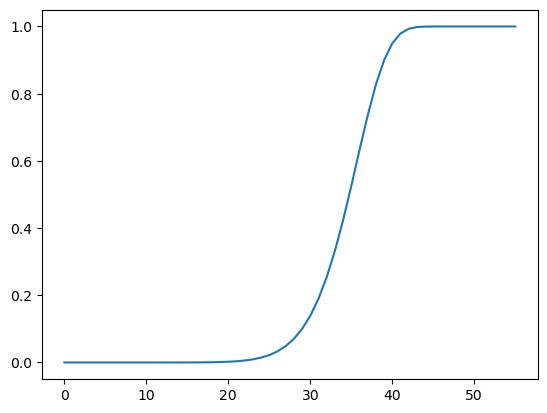

In [10]:
projectlife2T50T90(29)

In [21]:
#Mod Project Lifetime
idx_temp = pd.RangeIndex(start=2022,stop=2051,step=1) #create the index
life = pd.DataFrame(index=idx_temp, columns=['mod_lifetime'], dtype=float)
life.loc[2022] = 20
#life.loc[2030] = 
life.loc[2050] = 32
life.interpolate(inplace=True)
#life2 = round(life,0)+1
#pd.concat([life,life2], axis=1)

,mod_lifetime,T50,T90
2022,20.0,25.62,30.000000
2023,20.0,26.06,30.428571
2024,21.0,26.49,30.857143
2025,21.0,26.93,31.285714
2026,22.0,27.37,31.714286
2027,22.0,27.80,32.142857
2028,23.0,28.24,32.571429
2029,23.0,28.67,33.000000
2030,23.0,29.11,33.428571
2031,24.0,29.54,33.857143


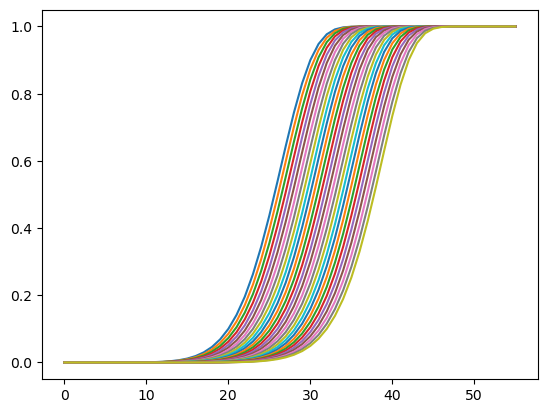

In [22]:
df_t50t90 = pd.DataFrame()
for row in life.index:
    T50,T90 = projectlife2T50T90(life.loc[row,'mod_lifetime'])
    df_t50t90.loc[row,'T50'] = T50
    df_t50t90.loc[row,'T90'] = T90
    
pd.concat([round(life,0),df_t50t90],axis=1)

In [23]:
#checking T90 from Ab et al 2018
params = PV_ICE.weibull_params({44.83: 0.50, 49: 0.90})
alphabeta2T10(params['alpha'],params['beta'])


38.99